<a href="https://colab.research.google.com/github/klarablum/Notebooks/blob/main/fashion_mnist_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importieren der Libraries

In [ ]:
#!pip install deeplearning2020
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#from deeplearning2020 import helpers

In [ ]:
% run 

#### Laden des MNIST Dataset

Als Erstes wollen wir den Datensatz wie im Video "Laden und Bearbeiten des MNIST Datensatz" laden.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Wir errinnern uns, dass die Pixelwerte noch nicht in normaliserter Form vorliegen. Wir normalisieren diese also zunächst indem wir durch den maximalen Pixelwert 255 teilen:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Zuletzt hatten wir noch das Problem, dass die Labels des Datensatzes einfach nur Zahlen waren.
- Das Bild der handgeschriebenen 5 hat das Label `5`.
- Wir hätten in diesem Fall jedoch gerne den Vektor `[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]` als Label, welcher der von unserem Netz gewünschten Ausgabe entspricht. Dieser Vektor hat nur an Stelle 5 (beginnend bei 0) eine 1.

Für detailliertere Erklärungen sei an dieser Stelle wieder auf das Video "Laden und Bearbeiten des MNIST Datensatzes" verwiesen.


In [ ]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

#### Entwurf eines Netzes

Nun haben wir die Eingabedaten normalisiert und die Labels als Vektoren vorliegen. Wir können also endlich anfangen ein Netz für die Erkennung der handgeschriebenen Zahlen zu bauen! :)  

Wir wollen dafür ein sehr einfaches Netz mit 3 Layern definieren (Eingabelayer, Hidden Layer und Ausgabelayer):
- Als **Input-Layer** verwenden wir einen `keras.layers.Flatten` Layer, der die 28x28 Matrizen, die wir als Eingaben erhalten auf $28\cdot 28 = 784$ Neuronen verteilt
- Als nächstes verwenden wir für den **Hidden-Layer** einen `keras.layers.Dense` Layer mit 128 Neuronen, wobei wir 128 als eine gute Anzahl empfinden
- Als **Output-Layer** verwenden wir einen `keras.layers.Dense` Layer mit 10 Neuronen, da wir 10 Klassen (Ziffern von 0-9) erkennen wollen


In [ ]:
model_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model_linear = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='linear'), 
    keras.layers.Dense(10, activation='linear')
])
model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model_tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'), 
    keras.layers.Dense(10, activation='tanh')
])
models= [model_sigmoid, model_linear, model_relu, model_tanh]

#### Kompilieren des Netzes

Nach dem wir unser Netz definiert haben, müssen wir es *kompilieren*, bevor wir mit dem Training beginnen können.

In diesem Schritt legen wir wichtige Parameter für die Trainingsphase fest:
- Der **Optimizer** ist der im Training verwendete Lernalgorithmus zur Verbesserung des Netzes. In der letzen Woche haben wir ja bereits *Gradient Descent* und dessen Optimierung *Stochastic Gradient Descent* (SGD, siehe *Deep Dive: Backpropagation*) kennengelernt.
- Der **Loss** ist die verwendete Kostenfunktion. Ziel während des Trainings ist es, diese zu minimieren. Wir haben in Woche 1 bereits die Quadratische Fehlerfunktion (*Squared Error*) kennengelernt.
- Die **Metrics** sind die während des Trainings ausgewerteten Metrics. Bei allen Klassifikationsproblemen interessiert uns hier die `"accuracy"`.

In diesem Beispiel verwenden wir 
- Den *Stochastic Gradient Descent* (`"sgd"`) Lernalgorithmus als unseren Optimizer.
- Die `"mean_squared_error"` Kostenfunktion, welche im Vergleich zur normalen *Squared Error* Kostenfunktion nicht die Summe, sondern den Mittelwert der Fehler der Ausgabeneuronen berechnet.

In [ ]:
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
[
 model.compile( 
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy']
    ) for model in models
]

[None, None, None, None]

#### Trainieren des Netzes

Jetzt können wir endlich unser Netz tranieren. Dazu verwenden wir die `fit` Methode und übergeben unsere Trainingsbilder als Eingaben mit den dazugehörigen Labels als gewünschte Ausgaben. Die Anzahl der `epochs` gibt an, wie oft das Netz das gesamte Trainingsset zu sehen bekommt. Erhöhen wir die Anzahl der Epochen lassen wir unser Netz länger lernen.  

In [ ]:
_train_labels = keras.utils.to_categorical(train_labels,10)
_test_labels = keras.utils.to_categorical(test_labels,10)
epochs=20
[
 model.fit(
    train_images, _train_labels, epochs, verbose=True
    )for model in models
] 

3000/3000 [==============================] - 5s 2ms/step - loss: 0.0866 - accuracy: 0.5500


In [ ]:
_,result_sigmoid=model_sigmoid.evaluate(test_images, _test_labels)
_,result_linear=model_linear.evaluate(test_images, _test_labels)
_,result_relu=model_relu.evaluate(test_images, _test_labels)
_,result_tanh=model_tanh.evaluate(test_images, _test_labels) 

313/313 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.5797


In [ ]:
from prettytable import PrettyTable
tbl = PrettyTable()
tbl.field_names = ["Activation function", f"Accuracy (after {epochs})"]
tbl.add_row(["tanh", result_tanh])
tbl.add_row(["sigmoid", result_sigmoid])
tbl.add_row(["relu", result_relu])
tbl.add_row(["linear", result_linear])
print(tbl)

+---------------------+---------------------+
| Activation function | Accuracy (after 20) |
+---------------------+---------------------+
|         tanh        |  0.5796999931335449 |
|       sigmoid       | 0.10000000149011612 |
|         relu        |  0.2985999882221222 |
|        linear       |  0.4691999852657318 |
+---------------------+---------------------+


#### Evaluieren des Netzes

Bisher hat das Netz nur Trainingsbilder gesehen und damit gelernt. Ziel ist es aber ja, mit unserem Netz neue Bilder von handgeschriebenen Ziffern zu erkennen. Dafür gibt es ja die Testdaten, mit denen wir unser Netz nun auf die Genauigkeit bei ungesehenen Daten überprüfen wollen.

In [ ]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.63


#### Ausgaben des Netzes

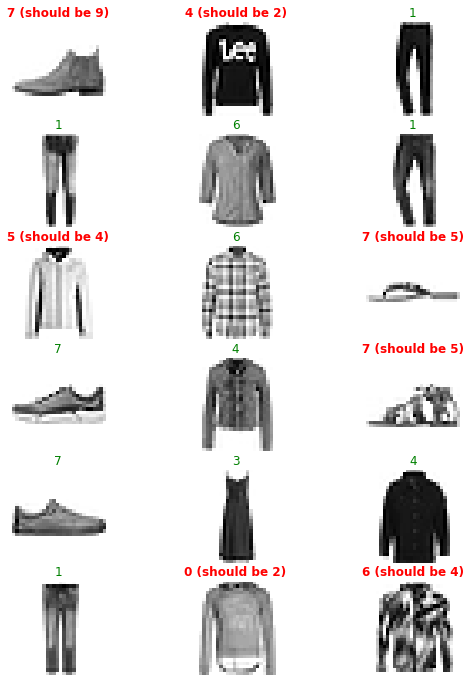

In [ ]:
helpers.plot_predictions(model_tanh, test_images[:20], labels=test_vec_labels[:20])